In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")


In [2]:
df1=pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2=pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3=pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")

In [3]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape


(1006029, 7)

In [4]:
#Clean Column Names

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [6]:
# Handle Missing Values

In [7]:
# Date Processing

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [9]:
# Define Age Columns

In [10]:
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

In [11]:
# Total Enrolment Column
df['total_enrolment'] = df[age_cols].sum(axis=1)


In [32]:
import os

os.makedirs("outputs", exist_ok=True)


In [12]:
# Age-wise Enrolment (Univariate)

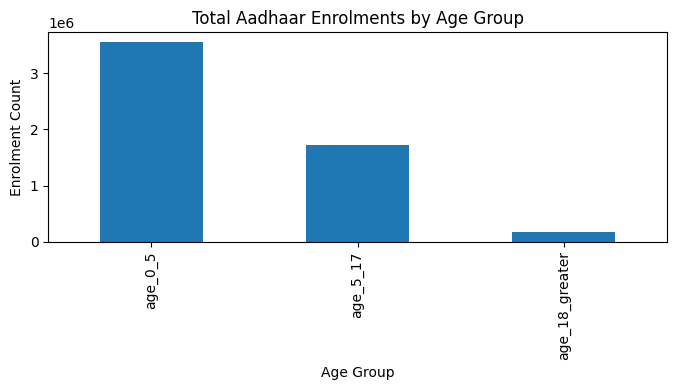

In [33]:
plt.figure(figsize=(7,4))
df[age_cols].sum().plot(kind='bar')
plt.title("Total Aadhaar Enrolments by Age Group")
plt.ylabel("Enrolment Count")
plt.xlabel("Age Group")
plt.tight_layout()
plt.savefig("outputs/age_wise_enrolment.png", dpi=300)
plt.show()


In [14]:
# State-wise Enrolment (Bivariate)

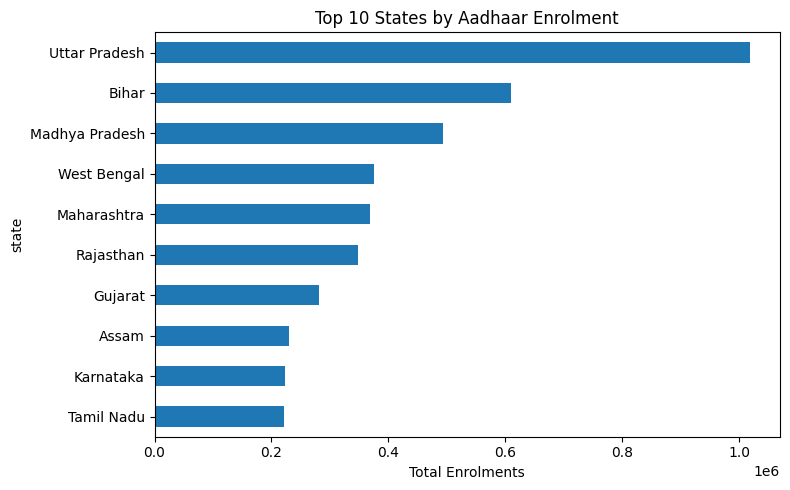

In [35]:
state_enrol = df.groupby("state")[age_cols].sum()
state_enrol['total'] = state_enrol.sum(axis=1)

top_states = state_enrol.sort_values("total", ascending=False).head(10)

plt.figure(figsize=(8,5))
top_states['total'].plot(kind='barh')
plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("Total Enrolments")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("outputs/state_wise_enrolment.png", dpi=300)
plt.show()


In [34]:
# Monthly Enrolment Trend

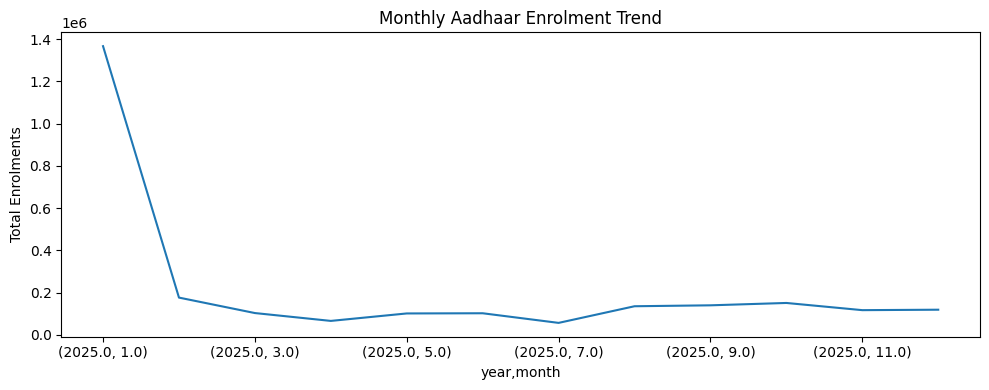

In [36]:
monthly_trend = df.groupby(['year','month'])['total_enrolment'].sum()

plt.figure(figsize=(10,4))
monthly_trend.plot()
plt.title("Monthly Aadhaar Enrolment Trend")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.savefig("outputs/monthly_trend.png", dpi=300)
plt.show()


In [18]:
# District-wise Distribution

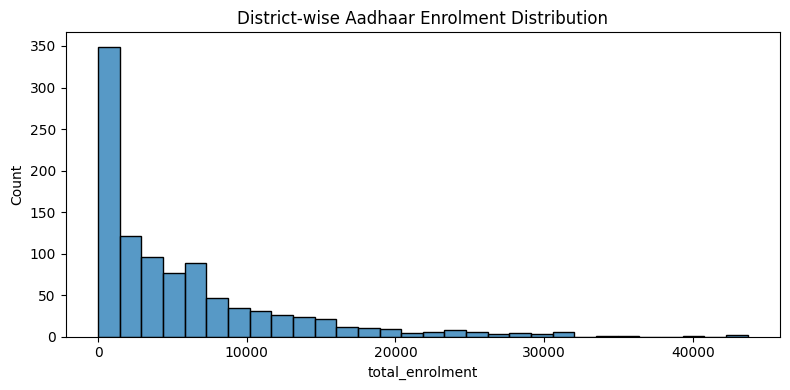

In [37]:
district_enrol = df.groupby("district")['total_enrolment'].sum()

plt.figure(figsize=(8,4))
sns.histplot(district_enrol, bins=30)
plt.title("District-wise Aadhaar Enrolment Distribution")
plt.tight_layout()
plt.savefig("outputs/district_distribution.png", dpi=300)
plt.show()


In [20]:
# Trivariate Analysis (State × Year × Adult)

In [21]:
pivot_table = df.pivot_table(
    values='age_18_greater',
    index='state',
    columns='year',
    aggfunc='sum'
)


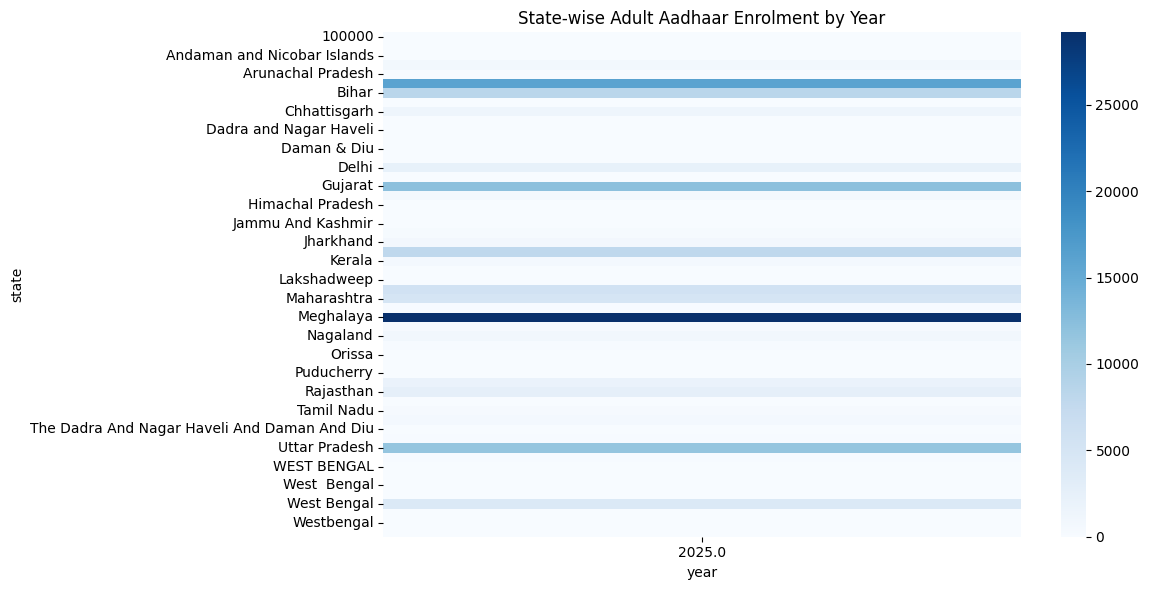

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table.fillna(0), cmap="Blues")
plt.title("State-wise Adult Aadhaar Enrolment by Year")
plt.tight_layout()
plt.savefig("outputs/state_year_heatmap.png", dpi=300)
plt.show()


In [23]:
# . Anomaly Detection

In [24]:
df['z_score'] = zscore(df['total_enrolment'])
anomalies = df[df['z_score'].abs() > 3]

anomalies[['state','district','total_enrolment','z_score']].head()


,state,district,total_enrolment,z_score
0,Meghalaya,East Khasi Hills,109,3.280174
2,Uttar Pradesh,Kanpur Nagar,123,3.723454
3,Uttar Pradesh,Aligarh,106,3.185186
10,Uttar Pradesh,Maharajganj,114,3.438489
11,Bihar,Sitamarhi,145,4.420038


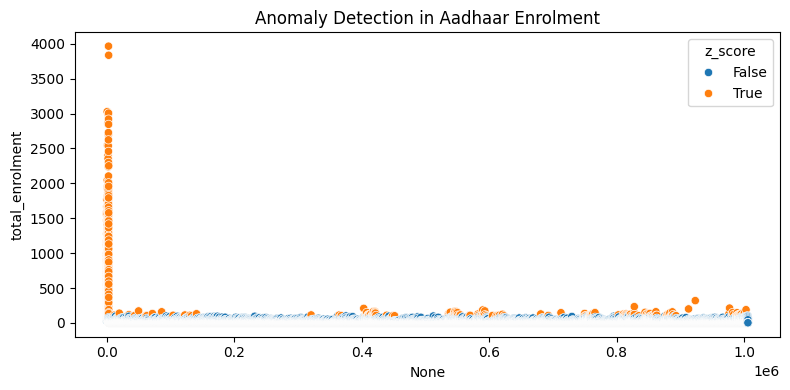

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df.index, y=df['total_enrolment'], hue=df['z_score'].abs() > 3)
plt.title("Anomaly Detection in Aadhaar Enrolment")
plt.tight_layout()
plt.savefig("outputs/anomaly_detection.png", dpi=300)
plt.show()

In [25]:
# Year-wise Trend & Prediction (ML)

In [26]:
trend_df = df.groupby('year')['total_enrolment'].sum().reset_index()
trend_df['year'] = trend_df['year'].astype(int)

X = trend_df[['year']]
y = trend_df['total_enrolment']

model = LinearRegression()
model.fit(X, y)

trend_df['predicted'] = model.predict(X)


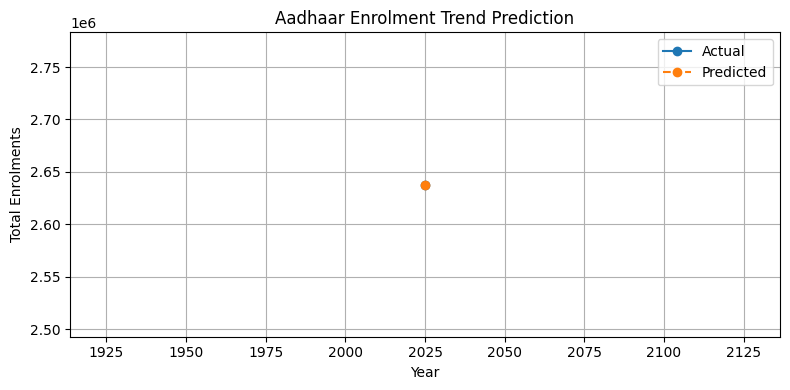

In [40]:
# Actual vs Predicted Plot
plt.figure(figsize=(8,4))
plt.plot(trend_df['year'], trend_df['total_enrolment'], marker='o', label='Actual')
plt.plot(trend_df['year'], trend_df['predicted'], linestyle='--', marker='o', label='Predicted')
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.title("Aadhaar Enrolment Trend Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/trend_prediction.png", dpi=300)
plt.show()


In [28]:
print("""
✔ Aadhaar enrolments are dominated by adult population (18+)
✔ Significant regional disparity exists across states and districts
✔ Enrolment shows a stable increasing trend over time
✔ Predictive analysis indicates continued future demand
""")



✔ Aadhaar enrolments are dominated by adult population (18+)
✔ Significant regional disparity exists across states and districts
✔ Enrolment shows a stable increasing trend over time
✔ Predictive analysis indicates continued future demand

